# Lab02: Parametric Methods
## Mehmet Gönen
### October 12, 2021

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg

## Importing Data

In [2]:
# read data into memory
data_set = np.genfromtxt("lab02_data_set.csv", delimiter = ",", skip_header = 1)

# get x and y values
x = data_set[:,0]
y = data_set[:,1]

# get number of samples
N = data_set.shape[0]

x_test = np.linspace(0, 60, num = 601)

## Plotting Data

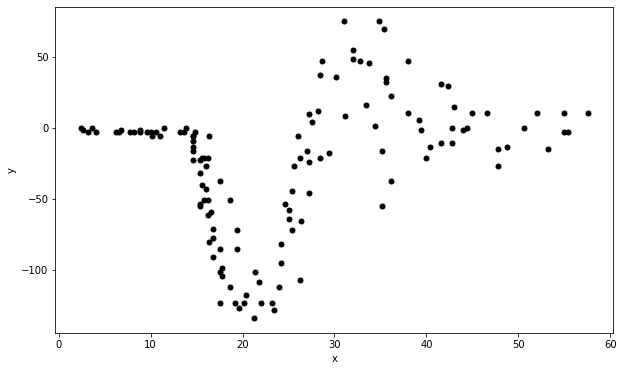

In [3]:
plt.figure(figsize = (10, 6))
plt.plot(x, y, "k.", markersize = 10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Linear Regression

\begin{align*}
\underbrace{\begin{bmatrix} N & \sum\limits_{i = 1}^{N} x_{i}\\ \sum\limits_{i = 1}^{N} x_{i} & \sum\limits_{i = 1}^{N} x_{i}^{2} \end{bmatrix}}_{\mathbf{A}} \underbrace{\begin{bmatrix}w_{0} \\ w_{1} \end{bmatrix}}_{\boldsymbol{w}} &= \underbrace{\begin{bmatrix}\sum\limits_{i = 1}^{N} y_{i} \\ \sum\limits_{i = 1}^{N} y_{i} x_{i} \end{bmatrix}}_{\boldsymbol{b}} \\
\boldsymbol{w} &= \mathbf{A}^{-1} \boldsymbol{b}
\end{align*}

In [4]:
# calculate A
A = np.array([[N, np.sum(x)], [np.sum(x), np.sum(x**2)]])
print(A)

[[   133.    3348.8]
 [  3348.8 107082.8]]


In [5]:
# calculate b
b = np.array([np.sum(y), np.sum(y * x)])
print(b)

[ -3397.6  -60720.36]


In [6]:
# calculate w
w = np.matmul(linalg.cho_solve(linalg.cho_factor(A), np.eye(2)), b)
print(w)

[-53.00792021   1.09067528]


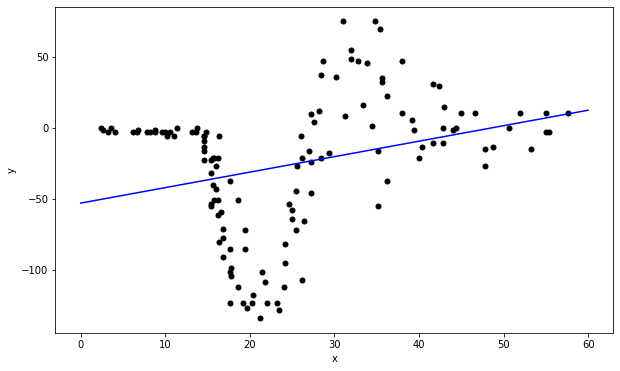

In [7]:
y_test = np.matmul(w, np.stack((np.repeat(1.0, len(x_test)), x_test)))

plt.figure(figsize = (10, 6))
plt.plot(x, y, "k.", markersize = 10)
plt.plot(x_test, y_test, "b-")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Polynomial Regression

\begin{align*}
\underbrace{\begin{bmatrix} N & \sum\limits_{i = 1}^{N} x_{i} & \dots &  \sum\limits_{i = 1}^{N} x_{i}^{K}\\ \sum\limits_{i = 1}^{N} x_{i} & \sum\limits_{i = 1}^{N} x_{i}^{2} & \dots & \sum\limits_{i = 1}^{N} x_{i}^{K + 1}\\ \vdots & \vdots & \ddots & \vdots \\
\sum\limits_{i = 1}^{N} x_{i}^{K} & \sum\limits_{i = 1}^{N} x_{i}^{K + 1} & \dots & \sum\limits_{i = 1}^{N} x_{i}^{2K}\end{bmatrix}}_{\mathbf{A}} \underbrace{\begin{bmatrix}w_{0} \\ w_{1} \\ \vdots \\ w_{K} \end{bmatrix}}_{\boldsymbol{w}} &= \underbrace{\begin{bmatrix}\sum\limits_{i = 1}^{N} y_{i} \\ \sum\limits_{i = 1}^{N} y_{i} x_{i} \\ \vdots \\ \sum\limits_{i = 1}^{N} y_{i} x_{i}^{K} \end{bmatrix}}_{\boldsymbol{b}} \\
\boldsymbol{w} &= \mathbf{A}^{-1} \boldsymbol{b}
\end{align*}

In [8]:
def polynomial_regression(x, y, K):
    # calculate A
    A = np.zeros((K + 1, K + 1))
    for i in range(K + 1):
        for j in range(K + 1):
            A[i, j] = np.sum(x**i * x**j)

    # calculate b
    b = np.repeat(0.0, K + 1)
    for i in range(K + 1):
        b[i] = np.sum(y * x**i)

    # calculate w
    w = np.matmul(linalg.cho_solve(linalg.cho_factor(A), np.eye(K + 1)), b)

    return(w)

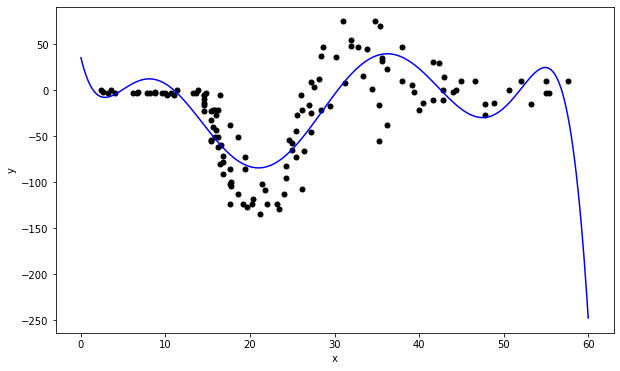

In [9]:
K = 7
w = polynomial_regression(x, y, K)
y_test = np.matmul(w, np.stack([x_test ** k for k in range(K + 1)]))

plt.figure(figsize = (10, 6))
plt.plot(x, y, "k.", markersize = 10)
plt.plot(x_test, y_test, "b-")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

\begin{align*}
\begin{bmatrix} N & \sum\limits_{i = 1}^{N} x_{i} & \dots &  \sum\limits_{i = 1}^{N} x_{i}^{K}\\ \sum\limits_{i = 1}^{N} x_{i} & \sum\limits_{i = 1}^{N} x_{i}^{2} & \dots & \sum\limits_{i = 1}^{N} x_{i}^{K + 1}\\ \vdots & \vdots & \ddots & \vdots \\
\sum\limits_{i = 1}^{N} x_{i}^{K} & \sum\limits_{i = 1}^{N} x_{i}^{K + 1} & \dots & \sum\limits_{i = 1}^{N} x_{i}^{2K}\end{bmatrix} \begin{bmatrix}w_{0} \\ w_{1} \\ \vdots \\ w_{K} \end{bmatrix} &= \begin{bmatrix}\sum\limits_{i = 1}^{N} y_{i} \\ \sum\limits_{i = 1}^{N} y_{i} x_{i} \\ \vdots \\ \sum\limits_{i = 1}^{N} y_{i} x_{i}^{K} \end{bmatrix} \\
\\
\underbrace{\begin{bmatrix}1 & 1 & \dots & 1\\ x_{1} & x_{2} & \dots & x_{N} \\ \vdots & \vdots & \ddots & \vdots \\ x_{1}^{K} & x_{2}^{K} & \dots & x_{N}^{K} \end{bmatrix}}_{\mathbf{D}^{\top}} \underbrace{\begin{bmatrix}1 & x_{1} & \dots & x_{1}^{K}\\ 1 & x_{2} & \dots & x_{2}^{K} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{N} & \dots & x_{N}^{K} \end{bmatrix}}_{\mathbf{D}} \underbrace{\begin{bmatrix}w_{0} \\ w_{1} \\ \vdots \\ w_{K} \end{bmatrix}}_{\boldsymbol{w}} &= \underbrace{\begin{bmatrix}1 & 1 & \dots & 1\\ x_{1} & x_{2} & \dots & x_{N} \\ \vdots & \vdots & \ddots & \vdots \\ x_{1}^{K} & x_{2}^{K} & \dots & x_{N}^{K} \end{bmatrix}}_{\mathbf{D}^{\top}} \underbrace{\begin{bmatrix}y_{1} \\ y_{2} \\ \vdots \\ y_{N} \end{bmatrix}}_{\boldsymbol{y}} \\
\boldsymbol{w} &= \left(\mathbf{D}^{\top}\mathbf{D}\right)^{-1} \mathbf{D}^{\top} \boldsymbol{y}
\end{align*}

In [10]:
def polynomial_regression(x, y, K):
    # calculate D
    D = np.transpose(np.stack([x ** k for k in range(K + 1)]))

    # calculate w
    w = np.matmul(linalg.cho_solve(linalg.cho_factor(np.matmul(np.transpose(D), D)), np.eye(K + 1)),
                  np.matmul(np.transpose(D), y))

    return(w)

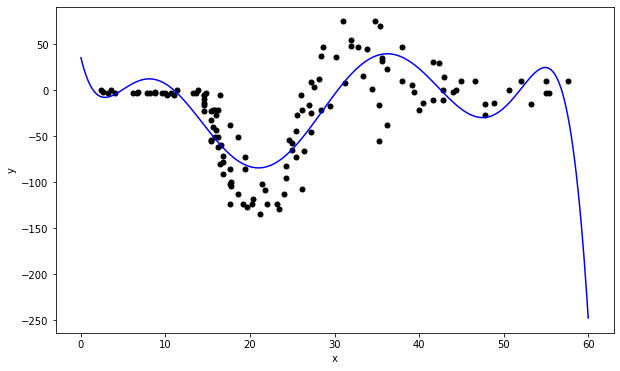

In [11]:
K = 7
w = polynomial_regression(x, y, K)
y_test = np.matmul(w, np.stack([x_test ** k for k in range(K + 1)]))

plt.figure(figsize = (10, 6))
plt.plot(x, y, "k.", markersize = 10)
plt.plot(x_test, y_test, "b-")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Nonlinear Regression

In [12]:
def nonlinear_regression(x, y, centers, sigma):
    # calculate D
    D = np.transpose(np.vstack((np.ones((1, len(x))), [np.exp(-(x - centers[k]) ** 2 / (2 * sigma**2)) for k in range(len(centers))])))

    # calculate w
    w = np.matmul(linalg.cho_solve(linalg.cho_factor(np.matmul(np.transpose(D), D)), np.eye(len(centers) + 1)),
                  np.matmul(np.transpose(D), y))

    return(w)

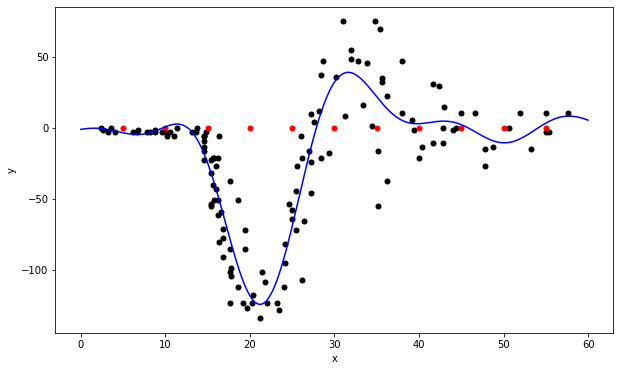

In [13]:
centers = np.linspace(5, 55, 11)
sigma = 5
w = nonlinear_regression(x, y, centers, sigma)
D_test = np.transpose(np.vstack((np.ones((1, len(x_test))), [np.exp(-(x_test - centers[k]) ** 2 / (2 * sigma**2)) for k in range(len(centers))])))
y_test = np.matmul(D_test, w)

plt.figure(figsize = (10, 6))
plt.plot(x, y, "k.", markersize = 10)
plt.plot(centers, np.repeat(0, len(centers)), "r.", markersize = 10)
plt.plot(x_test, y_test, "b-")
plt.xlabel("x")
plt.ylabel("y")
plt.show()